In [52]:
include("../src/vafSim.jl")
include("../src/burdenDyn.jl")
include("../src/compoundPoisson.jl")

Main.CompoundPoisson

In [53]:
using .VAFSim
using .BurdenDyn
using .CompoundPoisson

In [54]:
using Plots
gr()

Plots.GRBackend()

In [55]:
## System parameters
sysParams = Dict(
    "N"=>500,
    "μ"=> 1.5,
    "λ"=> 5.0,
    "p"=> 0.5,
    "t"=>50
)

Dict{String,Real} with 5 entries:
  "μ" => 1.5
  "λ" => 5.0
  "N" => 500
  "t" => 50
  "p" => 0.5

In [57]:
using ProgressMeter

In [58]:
# single cell simulation

sims = 100
nMutsEns_cell = Array{Int,1}(undef, 0)
@showprogress for i in 1:sims
    vaf_n, vafB_n, mFixed, mLive, nMutsSim_cell = VAFSim.birthDeathAlt(
        sysParams["N"],
        sysParams["μ"],
        1-sysParams["p"],
        100,
        sysParams["t"],
        sysParams["λ"])
    append!(nMutsEns_cell, nMutsSim_cell)
end

Progress: 100%|█████████████████████████████████████████| Time: 1:39:42


In [47]:
## Compound Poisson prediction
@time nCellsCP_m = CompoundPoisson.randComPois(sysParams["λ"]*sysParams["t"], sysParams["p"], sysParams["μ"], 1000001);

 20.459814 seconds (1.00 M allocations: 2.954 GiB, 7.36% gc time)


In [7]:
## PDE burden prediction
@time nCellsEvolve_m = BurdenDyn.evolveBurden(sysParams, sysParams["t"], 2000, 1e-4);
# println(sum(nCellsEvolve_m))

2.3638318270467916e-5
9
[0.22313016014842982, 0.3346952402226448, 0.25102143016698364, 0.12551071508349182, 0.047066518156309425, 0.014119955446892818, 0.003529988861723209, 0.0007564261846549727, 0.0001418299096228074, 2.3638318270467916e-5]
 51.088940 seconds (250.29 M allocations: 8.119 GiB, 5.37% gc time)


2001-element Array{Float64,1}:
 -9.766884466100603e-101
  4.2842061389402754e-99
  3.50377889101346e-98
 -2.526302353580714e-96
 -9.632753542556904e-96
  9.76068421331929e-94
 -4.201362083387575e-93
 -1.4254865759847225e-91
  1.2384442789941866e-90
  8.916375749100768e-90
 -1.2799839398403987e-88
 -1.9692229455140775e-88
  7.198296447623144e-87
  ⋮
  8.534196197610336e-106
  6.750810774583799e-106
  5.339898519409218e-106
  3.589720035131004e-106
  1.8883144035779365e-106
  7.803085950474922e-107
  2.6055465999969885e-107
  7.234874122928178e-108
  1.710306274879912e-108
  3.497360948091689e-109
  6.168837574397592e-110
  8.491979643325167e-111

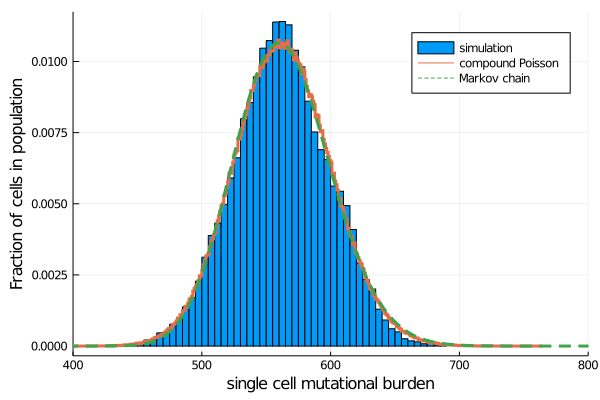

In [60]:
## Plot
h1 = histogram(nMutsEns_cell, normalize=true, label="simulation")
h1 = histogram!(nCellsCP_m, normalize=true, linewidth=3, label="compound Poisson")
plot!(nCellsEvolve_m/sysParams["N"], linewidth=3, linestyle=:dash, label="Markov chain")
# plot!(0:999, burden_m[1:1000]/sysParams["N"], linewidth=2, label="simulation")

xlabel!("single cell mutational burden")
ylabel!("Fraction of cells in population")
xlims!(400,800)

savefig(h1, "singleCellMutBurdenExample.pdf")

display(h1)